# **Clasificación de Flores de Iris / Iris Flower Classification**
--- 
El conjunto de datos Seaborn Iris es un dataset ampliamente utilizado en ciencia de datos y aprendizaje automático, especialmente para demostrar tareas de visualización y clasificación de datos. 

Contenido:

El conjunto de datos contiene mediciones de diversas características de tres especies diferentes de flores de iris. En concreto, incluye: 
- sepal_length: longitud del sépalo (en cm).
- sepal_width: ancho del sépalo (en cm).
- petal_length: longitud del pétalo (en cm).
- petal_width: ancho del pétalo (en cm).
- species: El tipo de flor de iris, que puede ser una de tres especies: Iris setosa, Iris versicolor o Iris virginica.

El objetivo es clasificar las flores Iris de entre las tres especies de acuerdo a longitud y ancho de sépalos y pétalos.

<p align="center"> 
  <img src="docs/iris_flower.png" alt="Descripcion Flores de Iris" width="800"/>
</p>



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Carga de datos**

In [2]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## **EDA**
---

### **Exploración del dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Primeras Observaciones**

El dataset cuenta con 150 instancias y podemos observar que no hay valores nulos.

### **Visualización del Dataset**

**Pairplot**

Con un gráfico Pairplot podemos observar las relaciones de múltiples variables de manera compacta 

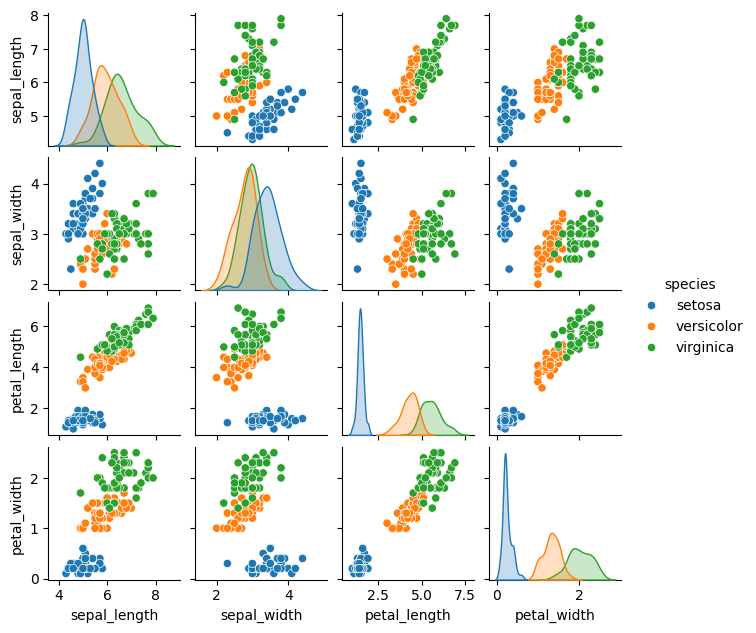

In [7]:
sns.pairplot(df, hue='species', height=1.6)

- Setosa es la más corta y Virginica es la mas larga
- Setosa se diferencia mucho de las otras especies

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

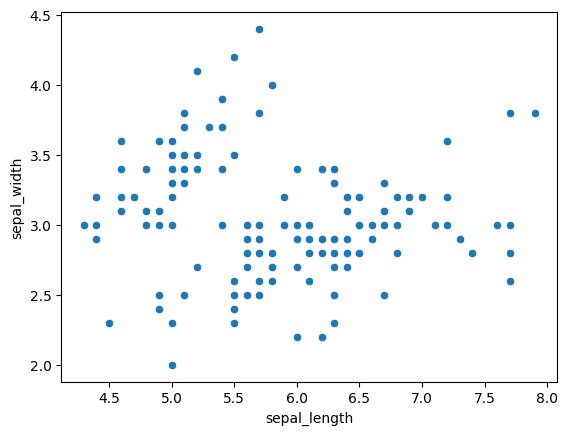

In [8]:
sns.scatterplot(df,x='sepal_length',y='sepal_width')

In [9]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

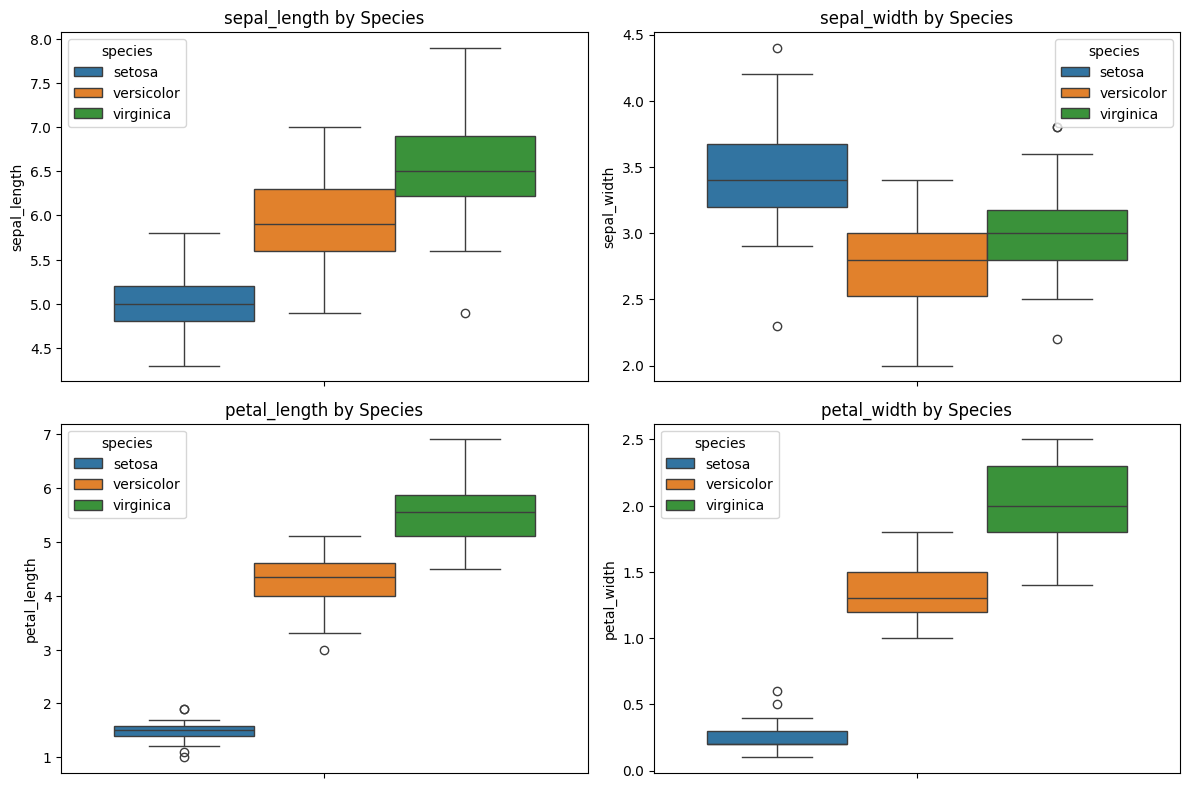

In [10]:
features = df.columns.values
features = features[:-1]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(data=df, y=feature, hue='species', ax=ax)
    ax.set_title(f"{feature} by Species")

plt.tight_layout()
plt.show()

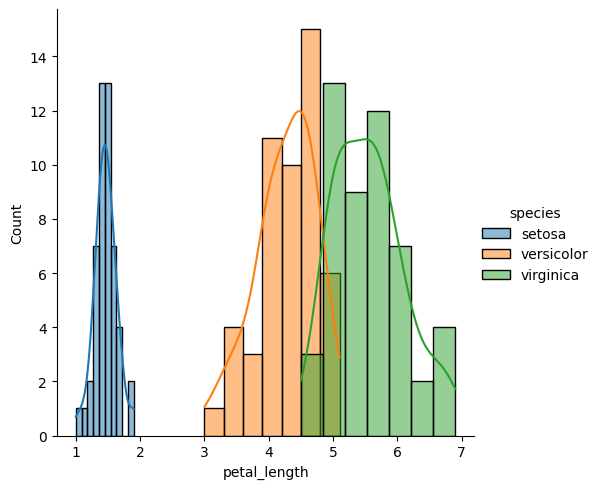

In [11]:
g = sns.FacetGrid(df,hue='species',height=5)
g.map(sns.histplot,'petal_length',kde=True)
g.add_legend()
plt.show()

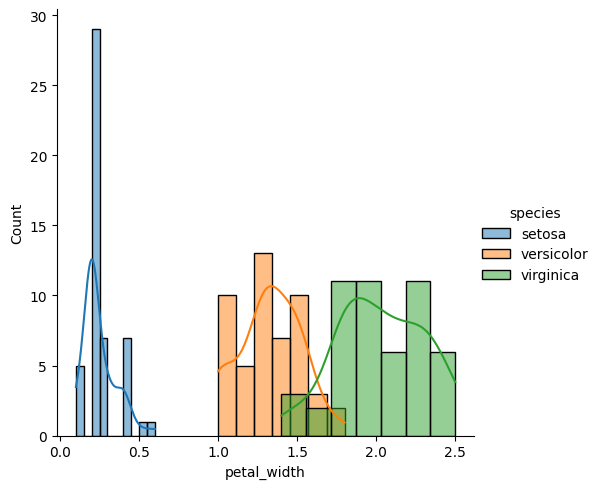

In [12]:
g = sns.FacetGrid(df,hue='species',height=5)
g.map(sns.histplot,'petal_width',kde=True)
g.add_legend()
plt.show()

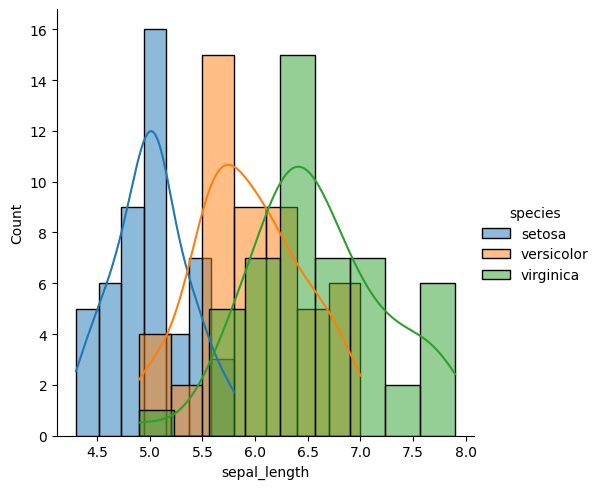

In [13]:
g = sns.FacetGrid(df,hue='species',height=5)
g.map(sns.histplot,'sepal_length',kde=True)
g.add_legend()
plt.show()

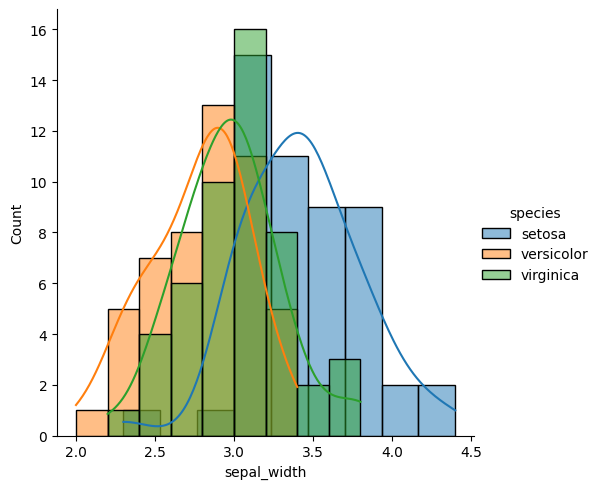

In [14]:
g = sns.FacetGrid(df,hue='species',height=5)
g.map(sns.histplot,'sepal_width',kde=True)
g.add_legend()
plt.show()

**Mapa de Calor** 

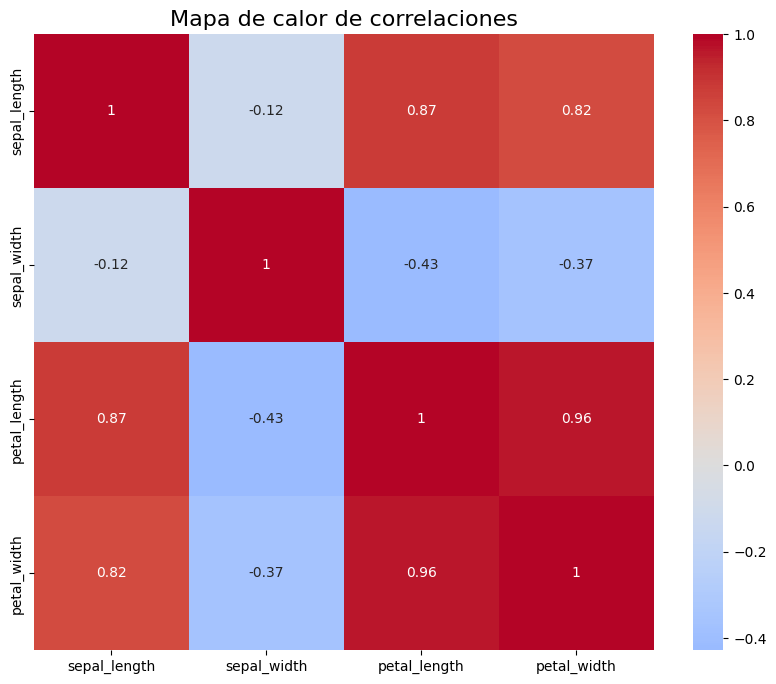

In [15]:
dfc = df.iloc[:,:-1]
corr = dfc.corr()   # calculamos la matriz de correlación

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.show()

## **Modelado**
---

### **Data Splitting**


En **Machine Learning supervisado**, se debe separar el dataset en *features* (X) y *target* (y):  


- **Features (X):** son las variables de entrada que describen las características de cada muestra (en el caso de Iris: largo y ancho de sépalo y pétalo).  
- **Target (y):** es la variable que queremos predecir (en este caso, la especie de la flor).  

Esta separación permite que el algoritmo de clasificación aprenda un **mapeo entre las características y la clase a la que pertenece cada observación**, de modo que luego pueda predecir la especie de nuevas flores desconocidas.  
- Las **columnas verdes** representan las features: largo y ancho de sépalo, largo y ancho de pétalo.
- La **columna azul** representa el target: la especie de la flor.

<p align="center">
  <img src="docs/features_target.png" alt="Features - Target" width="600"/>
</p>

1. El dataset (X, y) se divide en Train set y Test set.
2. El Train set se usa para entrenar el modelo.
3. El Test set se reserva para evaluar el rendimiento del modelo en datos no vistos.

<p align="center">
  <img src="docs/train_set.png" alt="Train Set Ilustration" width="500"/>
</p>

In [16]:
data = df.values
X = data[:,0:4] #Toma todas las filas, las columnas 0,1,2,3
Y = data[:,4] #Toma todas las filas, la columna 4 (species)

In [17]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
print(Y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [19]:
len(X)

150

In [20]:
len(Y)

150

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

**Feature Scalling**

Lo que queremos lograr es transformar los datos para que cada feature tenga:
- Media = 0
- Desviación estándar = 1
  
Esto normaliza los datos para que las caracteristicas sean comparables entre si

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Decision Tree**

1. Creamos un árbol de desición (Modelo)
2. Entrenampos el modelo 

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


- Se utilizan los datos de prueba para ver qué predice el modelo
- y_pred contiene las predicciones de clase para cada ejemplo de prueba

In [24]:
y_pred = classifier.predict(X_test)

**Matríz de Confusión**
- Compara las predicciones con los valores reales
- Podemos ver cuántos ejemplos se predijeron correctamente y cuantos fueron "confundidos"

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 12]])

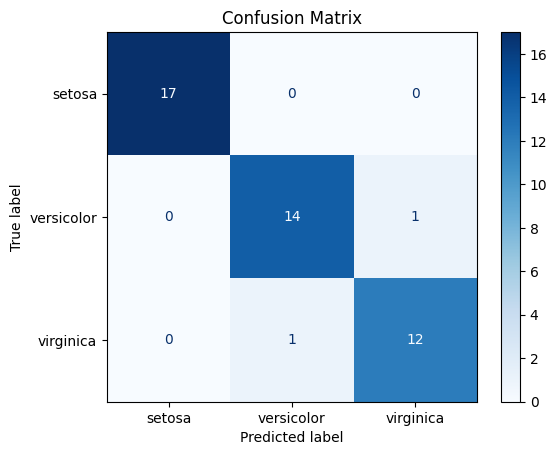

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [27]:
disp

**Acuracy**
- Proporción de predicciones correctas

In [28]:
from sklearn.metrics import accuracy_score

print('La precisión del Árbol de decisión es: %.2f' % accuracy_score(y_test, y_pred))

La precisión del Árbol de decisión es: 0.96


**Classification Report**

- Precision: De todos los ejemplos que el modelo predijo como esa clase, cuántos eran correctos.
- Recall (sensibilidad): De todos los ejemplos reales de esa clase, cuántos el modelo acertó.
- F1-score: Media armónica de precision y recall (balance entre ambas).
- Support: Cantidad de ejemplos reales de cada clase.

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      0.93      0.93        15
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



**Resultados**
- La precisión del Árbol de decisión es: 96%
- La clase 2 (versicolor) y 3 (virginica) tienen 1 error de predicción cada una
  
_Cómo se sigue?:_
- Se pueden ajustar hiperparámetros en el modelo actual para tratar de mejorar las predicciones
- Se pueden probar otros modelos: Random Forest, SVM, KNN
- Validación cruzada: para asegurarte de que el modelo generaliza bien

### **KNN**

In [30]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [31]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
df['species']= label_encoder.fit_transform(df['species']) 

X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 2)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [33]:
model.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
predict = model.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print('La precisión del modelo KNN es:',accuracy_score(predict,y_test),'%')
rmse = sqrt(mean_squared_error(y_test, predict))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, predict))

La precisión del modelo KNN es: 0.9555555555555556 %
RMSE value = 0.21
R2 Score= 0.93
